In [24]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [25]:
df = pd.read_csv("car_data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [27]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

The dataset has 301 entries and **no missing values**, which is excellent. The data types appear appropriate, with a mix of numerical (`int64`, `float64`) and categorical (`object`) columns.

In [28]:
# get summary statistics for numerical features
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Observations:
- **Average Selling Price:** Approximately 4.66 lakhs.
- **Maximum Present Price:** 92.6 lakhs, suggesting the presence of luxury cars in the dataset.
- **Kms Driven:** Wide range, with the highest value at 500,000 kms, indicating significant variation in car usage.

In [29]:
# check unique values and their counts for categorical features
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {column}")
    print(df[column].value_counts())
    print("\n" + "="*50 + "\n")


Unique values in Car_Name
Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64



Unique values in Fuel_Type
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64



Unique values in Seller_Type
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64



Unique values in Transmission
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64




In [30]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

### Observations

* **Fuel Type:** Most cars are **Petrol** powered, with 239 listings compared to 60 Diesel and only 2 CNG listings.
* **Seller Type:** The majority of listings are from **Dealers** (195), while 106 listings are from Individuals.
* **Transmission:** Most cars have a **Manual** transmission (261), significantly more than the 40 cars with Automatic transmission.
* **Owner:** The `Owner` column has a maximum value of 3, which is a rare occurrence as the majority of vehicles have an owner value of 0.

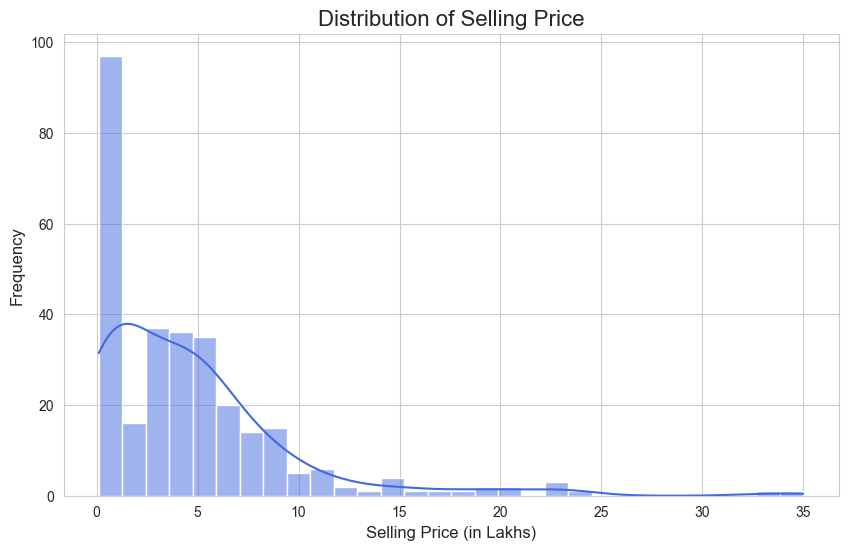

In [31]:
# visualizing selling price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True, bins=30, color='royalblue')
plt.title("Distribution of Selling Price", fontsize=16)
plt.xlabel("Selling Price (in Lakhs)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

### **Observation:**
The `Selling_Price` is **right-skewed**, meaning most cars have a lower price, with a few expensive cars creating a long tail. This is very common in price-related data and might require a log transformation for linear models later.

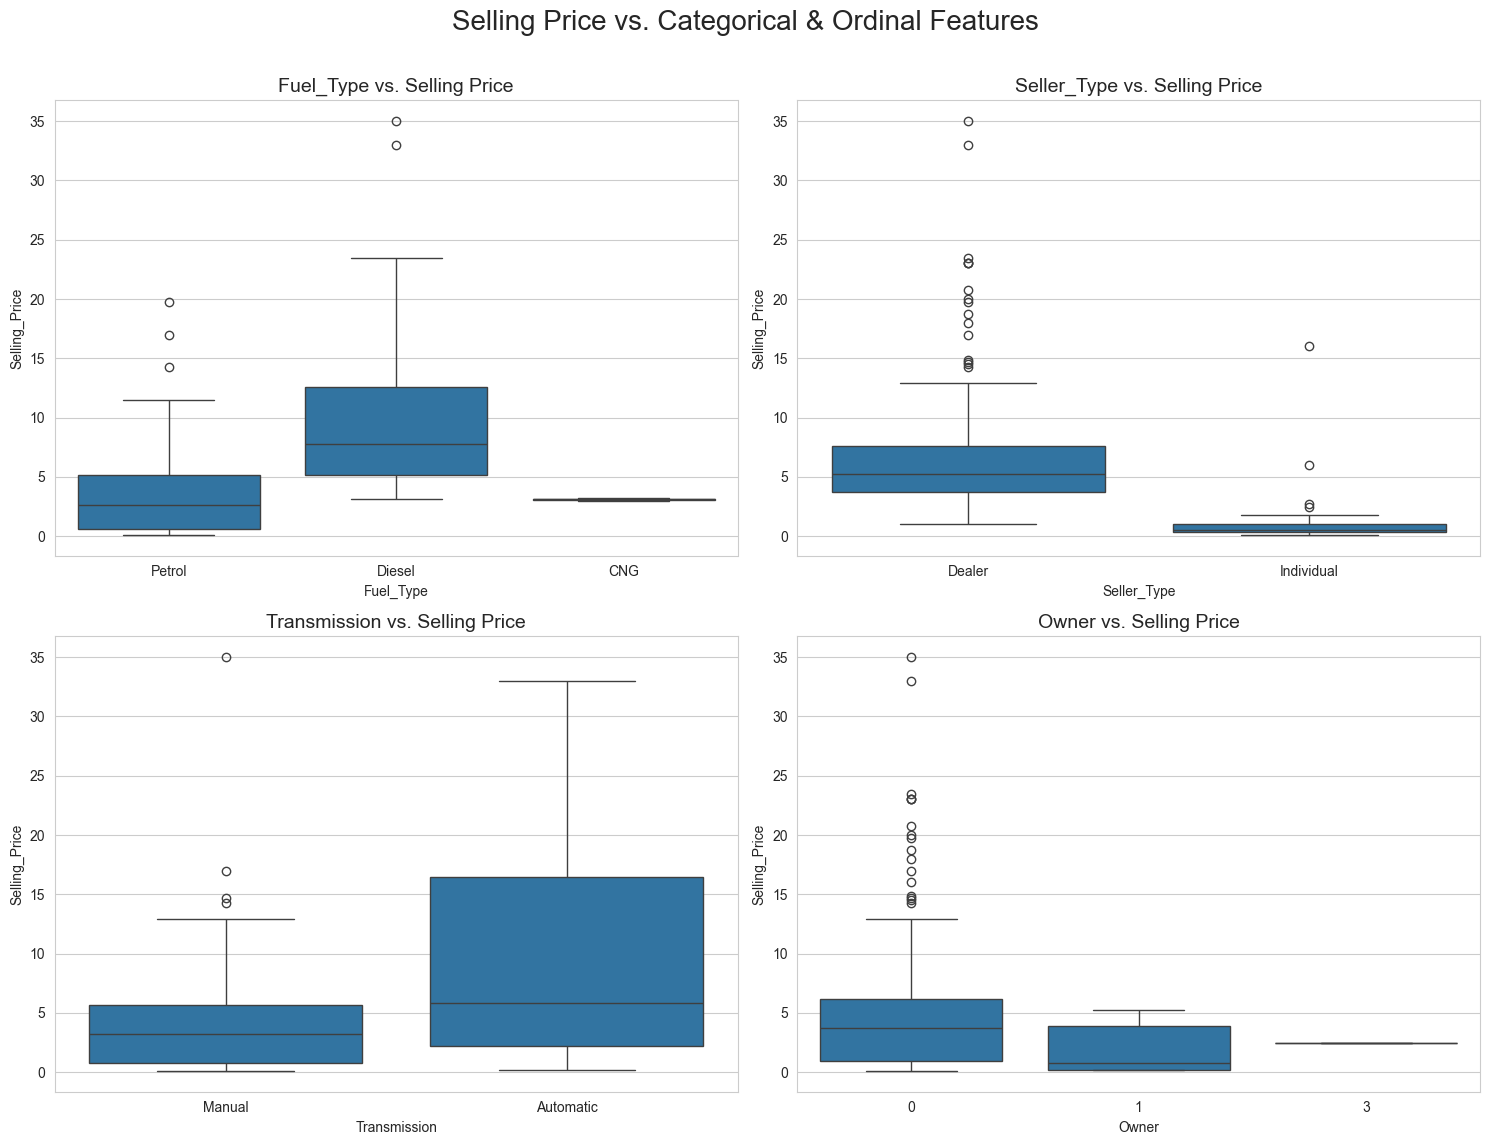

In [32]:
# Create a figure with subplots for our four categorical/ordinal features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Selling Price vs. Categorical & Ordinal Features', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
# Plot boxplots for each feature
for i, col in enumerate(categorical_features):
    sns.boxplot(ax=axes[i], x=col, y='Selling_Price', data=df)
    axes[i].set_title(f'{col} vs. Selling Price', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### **Observations:**
- **Fuel Type:** Diesel cars clearly have a higher median selling price.
- **Seller Type:** Cars sold by Dealers fetch significantly higher prices.
- **Transmission:** Automatic cars are priced considerably higher than manual ones.
- **Owner:** As expected, cars with fewer previous owners tend to have a higher selling price.

In [33]:
# Feeture Engineering Creating - Car_Age

# calculate the curret year
current_year = date.today().year

df ['Car_Age'] = current_year - df['Year']

df[['Year', 'Car_Age']].head()

,Year,Car_Age
0,2014,11
1,2013,12
2,2017,8
3,2011,14
4,2014,11


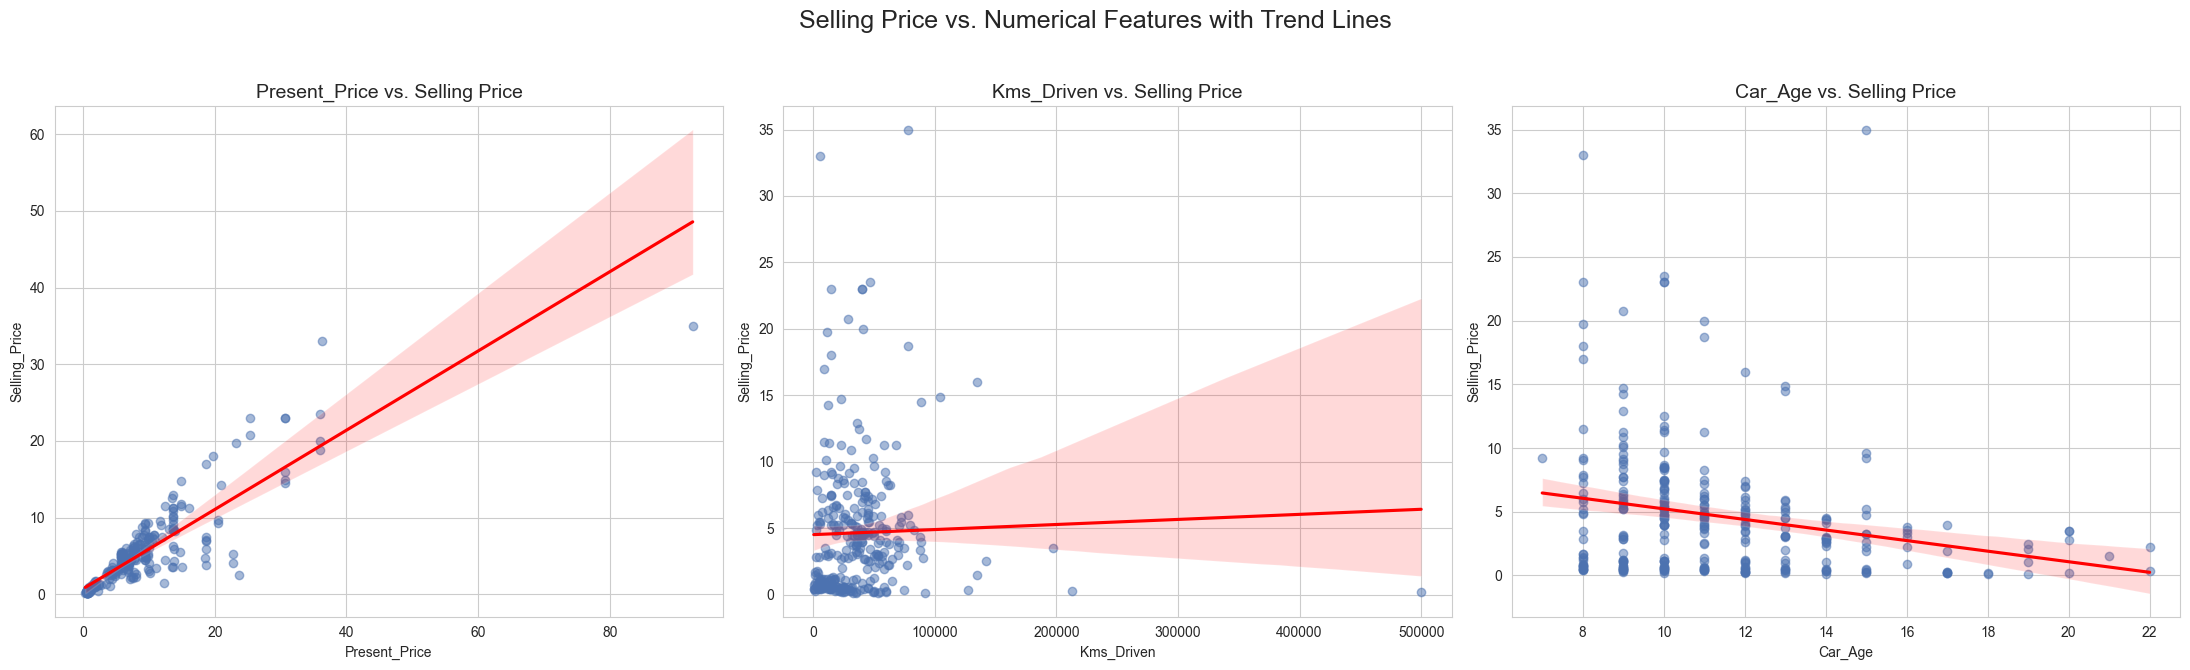

In [34]:
# relationship between numerical features and selling price
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle("Selling Price vs. Numerical Features with Trend Lines", fontsize=18)
for i, column in enumerate(['Present_Price', 'Kms_Driven', 'Car_Age'], start=0):
    sns.regplot(x=column, y='Selling_Price', data=df, ax=axes[i], scatter_kws={'alpha':0.5, 'color':'#4C72B0'}, line_kws={'color':'red'})
    axes[i].set_title(f"{column} vs. Selling Price", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Observations:**
- **Present Price:** There is a **strong positive linear relationship**. The regression line clearly shows that as showroom price increases, so does the selling price.
- **Kms Driven:** A **slight negative relationship** is visible. As mileage increases, the selling price tends to drop, although the relationship isn't as strong as with other features.
- **Car Age:** There is a **strong negative relationship**. The older the car, the lower its selling price.

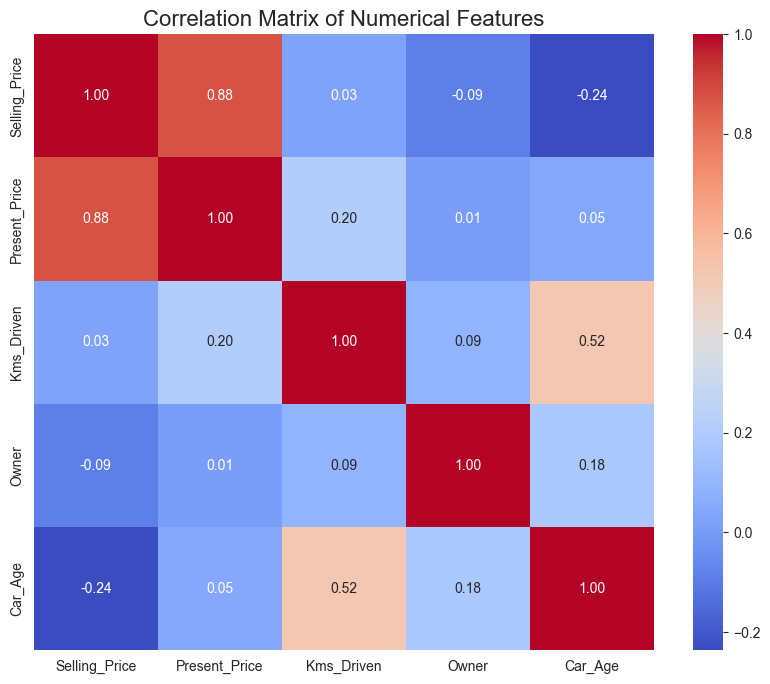

In [35]:
# multivariate analysis
num_df = df.select_dtypes(include=[np.number]).drop(columns='Year')

# calculate the correlation matrix
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

### **Observations:**
- `Selling_Price` has a very strong positive correlation with `Present_Price` (**0.88**).
- `Selling_Price` has a notable negative correlation with `Car_Age` (**-0.24**).
- The correlation with `Kms_Driven` is very weak (**-0.03**), suggesting its direct linear impact might be less significant than its age.

In [36]:
print(f"Number of unique car names: {df['Car_Name'].nunique()}")

print("\nSample of vehicle names that are clearly motorcycles:")
display(df[df['Car_Name'].str.contains('Royal Enfield|Hero|Bajaj')]['Car_Name'].unique())

Number of unique car names: 98

Sample of vehicle names that are clearly motorcycles:


array(['Royal Enfield Thunder 500', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'Royal Enfield Thunder 350',
       'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350',
       'Royal Enfield Classic 500', 'Bajaj Avenger 220',
       'Bajaj Avenger 150', 'Bajaj Pulsar 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F', 'Hero Passion X pro',
       'Bajaj Pulsar NS 200', 'Bajaj Avenger Street 220',
       'Hero Splender iSmart', 'Hero Passion Pro', 'Bajaj Pulsar 135 LS',
       'Hero Honda CBZ extreme', 'Hero Honda Passion Pro',
       'Hero Splender Plus', 'Bajaj Discover 100', 'Hero Glamour',
       'Hero Super Splendor', 'Bajaj Discover 125', 'Hero Hunk',
       'Hero  Ignitor Disc', 'Hero  CBZ Xtreme', 'Bajaj  ct 100'],
      dtype=object)

### **Observation:**
The `Car_Name` column has **98 unique values (high cardinality)**, which would be difficult to encode effectively. More importantly, the dataset contains a mix of **cars and motorcycles**. Building a single model to predict prices for both would be challenging and likely inaccurate. Therefore, this column should be dropped.

### **Conclusion & Actionable Insights for Modeling**

Through this exploratory data analysis, we have uncovered the key drivers of used vehicle prices in this dataset:

*   **Primary Price Driver:** `Present_Price` is the most significant predictor, showing a strong positive linear relationship with `Selling_Price`.
*   **Depreciation Factors:** `Car_Age` is a strong negative predictor. As a car gets older, its value decreases significantly. `Kms_Driven` also has a negative, though weaker, impact.
*   **Categorical Influence:** `Fuel_Type`, `Seller_Type`, and `Transmission` are all important predictors. Diesel cars, dealer-sold vehicles, and automatic cars consistently command higher prices.
*   **Data Quality Note:** The `Car_Name` feature has high cardinality and contains mixed vehicle types (cars and motorcycles), making it unsuitable for direct use in a general model.

**Actionable Insights for Modeling:**

Based on this analysis, the following steps will be taken for data preprocessing before training our prediction model:

1.  **Feature Selection:** The `Car_Name` and `Year` columns will be dropped.
2.  **Feature Engineering:** The engineered `Car_Age` feature will be used.
3.  **Categorical Encoding:** `Fuel_Type`, `Seller_Type`, and `Transmission` will be converted into a numerical format using one-hot encoding.
4.  **Data Splitting:** The dataset will be split into features (X) and the target variable (y, which is `Selling_Price`).
5.  **Train/Test Split:** The data will be divided into training and testing sets to evaluate model performance fairly.

# Data Preprocessing and Model Training

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [38]:
# drop the columns that are not needed for the model
df_final = df.drop(columns=['Car_Name', 'Year'])
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [39]:
# convert categorical columns into dummy/indicator vairables
df_final = pd.get_dummies(df_final, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True


**Note:** We use `drop_first=True` to avoid multicollinearity, a situation where one feature can be linearly predicted from the others. For example, if we know a car is not `Fuel_Type_Diesel` and not `Fuel_Type_Petrol`, it must be `CNG`. Removing one category per feature prevents this redundancy.

In [40]:
# separate features(X) and target (y)
X = df_final.drop(columns='Selling_Price')
y = df_final['Selling_Price']

print("Shape of features: ", X.shape)
print("Shape of target: ", y.shape)

Shape of features:  (301, 8)
Shape of target:  (301,)


In [41]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (240, 8)
Shape of X_test: (61, 8)
Shape of y_train: (240,)
Shape of y_test: (61,)


In [42]:
models = {
    "Linear Regressoin": LinearRegression(),
    "Random Forest" : RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train) # train the model
    y_pred = model.predict(X_test) # make predictions

    # calculate evaluation matrix
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {name} ---")
    print(f"Mean Absolute Error: {mae: .2f}")
    print(f"Mean Squared Error: {mse: .2f}")
    print(f"R-Squared (R²): {r2:.2f}")
    print("\n")

--- Linear Regressoin ---
Mean Absolute Error:  1.22
Mean Squared Error:  3.48
R-Squared (R²): 0.85


--- Random Forest ---
Mean Absolute Error:  0.64
Mean Squared Error:  0.92
R-Squared (R²): 0.96


--- XGBoost ---
Mean Absolute Error:  0.60
Mean Squared Error:  1.00
R-Squared (R²): 0.96




Both the Random Forest and XGBoost models performed exceptionally well, with a remarkable R-squared score of 0.96. This means they can explain 96% of the variance in the selling price, which is excellent. The Linear Regression model, while decent, is clearly outperformed.

**Given its slightly lower Mean Absolute Error, we will select the XGBoost as our final model for the web application.**

In [43]:
# choose the best model
best_model = XGBRegressor(random_state=42)
best_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [44]:
# save the best model
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Moodel is saved...")

Moodel is saved...
